In [1]:
# Importing Relevant Libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import pylab
import collections
import pymongo
import psycopg2
import paho.mqtt.client as mqtt
import seaborn as sns
from IPython import display
from pandas import datetime
from datetime import timedelta
from pymongo import MongoClient
from scipy import stats

import plotly.graph_objects as go
import plotly as py

py.offline.init_notebook_mode(connected=True)

In [68]:
# Set up MongoDB Client
client_mqtt = mqtt.Client()

# Set up NodeMCU Client
client_mongo = MongoClient('192.168.1.5')
temp_database = client_mongo['temp_collect']
data_1=temp_database['Temperature_1']
data_2=temp_database['Temperature_2']

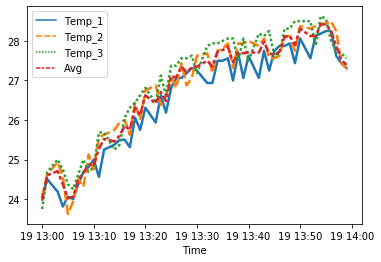

In [90]:
#Time : 2pm - 3pm , AC Temperature : 26, Date : 18/7/19
date_time=[]
tmp_1=[]
tmp_2=[]
tmp_3=[]
avg=[]
#specifying every n'th minute
time=1
#counter
c=time
for obj in data_1.find():
    time_h=(obj['Date-Time'])
   
    #if("15:" in time_h or "15:0" in time_h):
    if("07/19/2019 13" in time_h):
        if(c==time):
            date_time.append(datetime.strptime(obj['Date-Time'],'%m/%d/%Y %H:%M'))
            tmp_1.append(float(obj['tmp_1']))
            tmp_2.append(float(obj['tmp_2']))
            tmp_3.append(float(obj['tmp_3']))
            avg.append((float(obj['tmp_1'])+float(obj['tmp_2'])+float(obj['tmp_3']))/3)
            c=0
        c=c+1


d_2 = {'Time':date_time,'Temp_1':tmp_1,'Temp_2':tmp_2,'Temp_3':tmp_3,'Avg':avg}
data_time=pd.DataFrame(d_2)
data_time=data_time.set_index('Time')
sns.lineplot(palette="tab10", linewidth=2.5,data=data_time)

In [85]:
data_time['MA_1']=data_time.Avg.rolling(window=20).mean()

In [78]:
data_time.head()

,Temp_1,Temp_2,Temp_3,Avg,MA_1
Time,,,,,
2019-07-19 12:08:00,24.125,24.375,24.687,24.395667,NaN
2019-07-19 12:09:00,24.562,24.875,24.375,24.604000,NaN
2019-07-19 12:10:00,24.750,25.250,25.250,25.083333,NaN
2019-07-19 12:12:00,24.687,24.750,25.125,24.854000,NaN
2019-07-19 12:13:00,24.250,23.563,24.188,24.000333,NaN


In [79]:
#plot correlation of temperatures with AVG

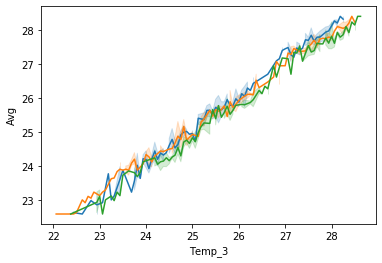

In [70]:
sns.lineplot(x="Temp_1", y="Avg",data=data_time)
sns.lineplot(x="Temp_2", y="Avg",data=data_time)
sns.lineplot(x="Temp_3", y="Avg",data=data_time)


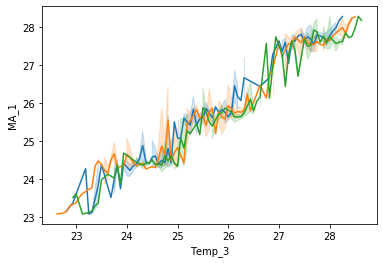

In [67]:
sns.lineplot(x="Temp_1", y="MA_1",data=data_time)
sns.lineplot(x="Temp_2", y="MA_1",data=data_time)
sns.lineplot(x="Temp_3", y="MA_1",data=data_time)


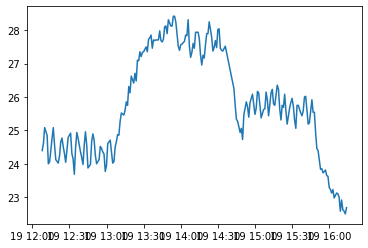

In [86]:
sns.lineplot(data=data_time['Avg'])

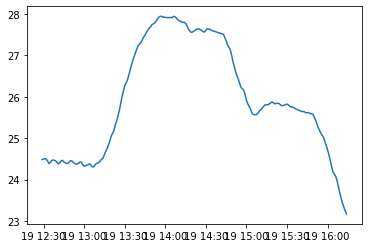

In [87]:
sns.lineplot(data=data_time['MA_1'])

In [88]:
from scipy.stats.stats import pearsonr 
data_time=data_time.dropna()
print (pearsonr(data_time['MA_1'], data_time['Avg']))

(0.8800909112060482, 5.391591762417557e-65)


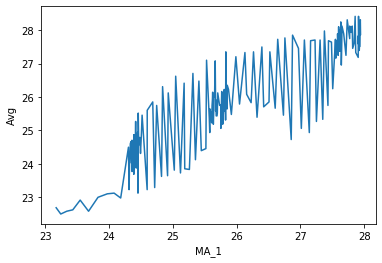

In [89]:
sns.lineplot(x="MA_1", y="Avg",data=data_time)

In [48]:
data_time.head()

,Temp_1,Temp_2,Temp_3,Avg,MA
Time,,,,,
2019-07-19 12:08:00,24.125,24.375,24.687,24.395667,NaN
2019-07-19 12:12:00,24.687,24.750,25.125,24.854000,NaN
2019-07-19 12:15:00,24.250,24.312,24.625,24.395667,24.548444
2019-07-19 12:18:00,24.562,24.062,25.062,24.562000,24.603889
2019-07-19 12:22:00,24.125,24.000,24.562,24.229000,24.395556
